# AutoEncode
- 표현(특징) 학습
    * 데이터에 주요 특징을 찾아 압축 후 복원하는 학습 모델

- 구성
    * 인코더(Encoder) : 입력 데이터에서 주요 특징 추출
    * 디코더(Decoder) : 주요 특징에서 원 데이터로 복원

In [40]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# W,b 고정하도록 seed 설정
set_random_seed(42)

### [1] 데이터 준비 및 로딩

In [25]:
(x_train, y_train), (x_test, y_test) = load_data()

In [26]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## [2] 데이터 전처리

In [27]:
# 스케일링 => 픽셀 / 255.0
x_train=x_train/255.0
x_test=x_test/255.0

In [28]:
x_train=x_train.reshape(-1, 28*28)
x_test=x_test.reshape(-1, 28*28)

In [29]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [30]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(
x_train, y_train, stratify=y_train ,random_state=12, test_size=0.2)

x_train, x_val, y_train, y_val=train_test_split(
x_train, y_train, stratify=y_train ,random_state=12, test_size=0.2)

## [3] 모델 구성

In [33]:
def createModel(n_node):
    model=Sequential()
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))
    model.add(Dense(784, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [54]:
model01.summary(), model02.summary(), model03.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 785       
                                                                 
 dense_5 (Dense)             (None, 784)               1568      
                                                                 
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 1570      
                                                                 
 dense_7 (Dense)             (None, 784)               2352      
                                                                 
Total params: 3,922
Trainable 

(None, None, None)

## [4] 모델 학습

In [120]:
model01=createModel(1)
model02=createModel(2)
model03=createModel(3)
model15=createModel(15)
model100=createModel(100)
model1000=createModel(1000)

In [121]:
plot_model(model01)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [122]:
# x값, x값 입력 데이터 -> 답을 가지고 있지 않아서? 비지도 학습
model01.fit(x_train, x_train, epochs=1)
model02.fit(x_train, x_train, epochs=1)
model03.fit(x_train, x_train, epochs=1)
model15.fit(x_train, x_train, epochs=1)
model100.fit(x_train, x_train, epochs=1)
model1000.fit(x_train, x_train, epochs=1)

1200/1200 [==============================] - 11s 9ms/step - loss: 0.0111


In [123]:
print(model01.evaluate(x_train, x_train))
print(model02.evaluate(x_train, x_train))
print(model03.evaluate(x_train, x_train))
print(model15.evaluate(x_train, x_train))
print(model100.evaluate(x_train, x_train))
print(model1000.evaluate(x_train, x_train))

1200/1200 [==============================] - 1s 794us/step - loss: 0.0675
0.06749356538057327
1200/1200 [==============================] - 1s 883us/step - loss: 0.0617
0.061676036566495895
1200/1200 [==============================] - 1s 900us/step - loss: 0.0576
0.05758882686495781
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0314
0.031449709087610245
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0106
0.010619799606502056
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0030
0.002983082551509142


## 원본 - AE 진행된 이미지 비교

In [131]:
pre_out01=model01.predict(x_train[0].reshape(-1,784))
pre_out02=model02.predict(x_train[0].reshape(-1,784))
pre_out03=model03.predict(x_train[0].reshape(-1,784))
pre_out15=model15.predict(x_train[0].reshape(-1,784))
pre_out100=model100.predict(x_train[0].reshape(-1,784))
pre_out1000=model1000.predict(x_train[0].reshape(-1,784))

1/1 [==============================] - 0s 43ms/step


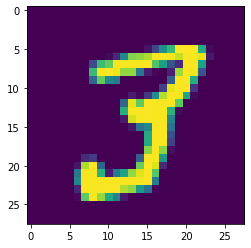

In [141]:
# 원본
plt.imshow(x_train[0].reshape(28,28))

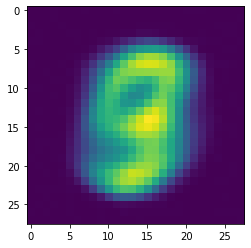

In [132]:
plt.imshow(pre_out01.reshape(28,28))

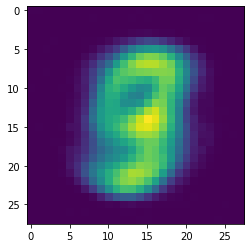

In [133]:
plt.imshow(pre_out02.reshape(28,28))

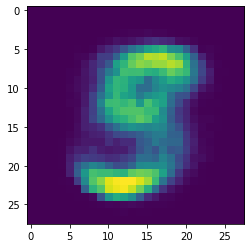

In [134]:
plt.imshow(pre_out03.reshape(28,28))

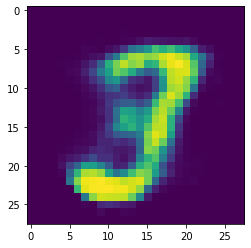

In [135]:
plt.imshow(pre_out15.reshape(28,28))

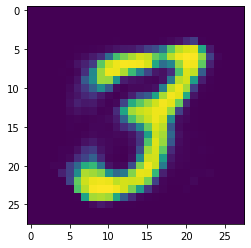

In [136]:
plt.imshow(pre_out100.reshape(28,28))

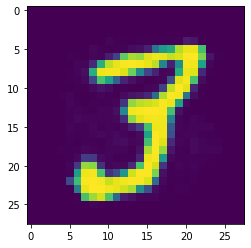

In [137]:
plt.imshow(pre_out1000.reshape(28,28))